In [1]:
# Input: "Hello World" 
# Output: "olleH dlroW" 
    
# Input: "Python is fun" 
# Output: "nohtyP si nuf" # Mistake
    
# # [::-1] Not to use this

In [2]:
# def reverse_word(sentence):  
#     words = sentence.split(" ") # Splitting the sentences 
    
#     reversed_words = [] 
#     for word in words:
#         reverse_word = " " 
#         for char in word: 
#             reverse_word = char + reverse_word 
#         reversed_words.append(reverse_word) 
        
#     reversed_sentences = ''.join(reversed_words) 
    
#     return reversed_sentences

In [3]:
# print(reverse_word('Python is fun'))

In [4]:
# print(reverse_word('Hello World'))

In [5]:
! pip3 install nltk 
! pip3 install textblob 
! pip3 install wordcloud

In [6]:
import numpy as np  
import pandas as pd
import seaborn as sns

# Visualisation
import matplotlib.pyplot as plt 
import plotly.graph_objects as go 
import plotly.io as pio 


# NLP 
import nltk 
from nltk.corpus import stopwords 
from nltk.sentiment import SentimentIntensityAnalyzer 
from textblob import Word, TextBlob 
from wordcloud import WordCloud  

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Business Problem 

Kozmos, a company specialized in home textiles and daily wear, there intents is too bisst sales by examining customer feedback. They will be address the concern and can roll out the offer accordingly. They are conducting sentiment analysis. 

In [7]:
df = pd.read_excel('amazon.xlsx') 
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [8]:
df.shape

(5611, 4)

In [9]:
# My dataset consist of comments made for a certain products, the title of comment., 
# the number of stars and the variable Helpful which says how many people found the comment useful

In [10]:
df.isnull().sum()

Star        0
HelpFul     0
Title      52
Review     18
dtype: int64

In [11]:
df.dropna(subset=['Review'], inplace=True)

In [12]:
df.isnull().sum()

Star        0
HelpFul     0
Title      43
Review      0
dtype: int64

# Text Preprocessing

In [13]:
# Text, text we do the lowercase 
# Text Normalization 

In [14]:
df['Review'] = df['Review'].str.lower()

In [15]:
# Punctuation  

df['Review'] = df['Review'].str.replace('[^\w\s]', '')

<ipython-input-15-701bdc4da246>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review'] = df['Review'].str.replace('[^\w\s]', '')


In [16]:
# Numbers 
df['Review'] = df['Review'].str.replace('\d', '')

<ipython-input-16-0866bfeeddff>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review'] = df['Review'].str.replace('\d', '')


In [17]:
stopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]

In [18]:
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [19]:
df

,Star,HelpFul,Title,Review
0,5,0,looks great,happy
1,5,0,Pattern did not align between the two panels.,good quality material panels mismatched
2,5,0,Imagery is stretched. Still fun.,product fun bedroom windowsbr imagery bit stre...
3,5,0,Que se ven elegantes muy finas,unico gustaria sean poco mas largas
4,5,0,Wow great purchase,great bang buck quality material vibrant color...
...,...,...,...,...
5606,4,0,Recommend,great product reasonable money delivered stage...
5607,5,0,"Terrible , different colors. I returned",color panels match
5608,5,0,Extremely pleasing,great studio complement entire theme studioliv...
5609,5,0,Perfect,brought beauty kids room love


In [20]:
# Rarewords 
temp_df = pd.Series(' '.join(df['Review']).split()).value_counts()
temp_df

curtains       1891
love           1312
room           1116
beautiful       943
great           921
               ... 
windmill          1
controlhems       1
squares           1
intent            1
equivalent        1
Length: 6222, dtype: int64

In [21]:
drops = temp_df[temp_df <= 1] 
drops

dividerbackdrop    1
goodwill           1
accentuate         1
elegance           1
ven                1
                  ..
windmill           1
controlhems        1
squares            1
intent             1
equivalent         1
Length: 3616, dtype: int64

In [22]:
df['Review'] = df['Review'].apply(lambda x : " ".join(x for x in x.split() if x not in drops))

In [23]:
df['Review']

0                                                   happy
1                            good quality material panels
2       product fun bedroom windowsbr imagery bit stre...
3                                                poco mas
4       great bang buck quality material vibrant color...
                              ...                        
5606    great product reasonable money delivered stage...
5607                                   color panels match
5608    great studio complement entire theme area phot...
5609                        brought beauty kids room love
5610                  cute curtains sons room thick light
Name: Review, Length: 5593, dtype: object

In [24]:
# Lemmatization  
nltk.download('wordnet') 
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\Harshit
[nltk_data]     Panchal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Harshit
[nltk_data]     Panchal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
df["Review"] = df['Review'].apply(lambda x : " ".join([Word(word).lemmatize() for word in x.split()]))

In [26]:
df['Review']

0                                                   happy
1                             good quality material panel
2       product fun bedroom windowsbr imagery bit stre...
3                                                 poco ma
4       great bang buck quality material vibrant color...
                              ...                        
5606    great product reasonable money delivered stage...
5607                                    color panel match
5608    great studio complement entire theme area phot...
5609                         brought beauty kid room love
5610                    cute curtain son room thick light
Name: Review, Length: 5593, dtype: object

In [27]:
# Visualisation 

In [28]:
# term frequency
tf = df['Review'].apply(lambda x : pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf

,index,0
0,happy,196.0
1,panel,226.0
2,good,535.0
3,quality,889.0
4,material,565.0
...,...,...
2367,oval,2.0
2368,bistro,2.0
2369,balance,2.0
2370,patchwork,2.0


In [29]:
tf.columns = ["words", "tf"] 
tf.sort_values('tf', ascending=False)

,words,tf
39,curtain,2588.0
84,love,1453.0
55,room,1129.0
96,beautiful,943.0
17,great,921.0
...,...,...
1838,embarrassed,2.0
1840,lip,2.0
1841,hiding,2.0
1842,illuminate,2.0


<AxesSubplot:xlabel='words'>

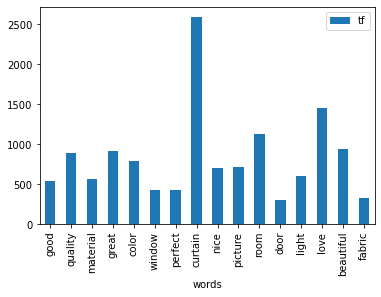

In [30]:
# bar chart 

tf[tf['tf'] > 300].plot.bar(x='words', y='tf')

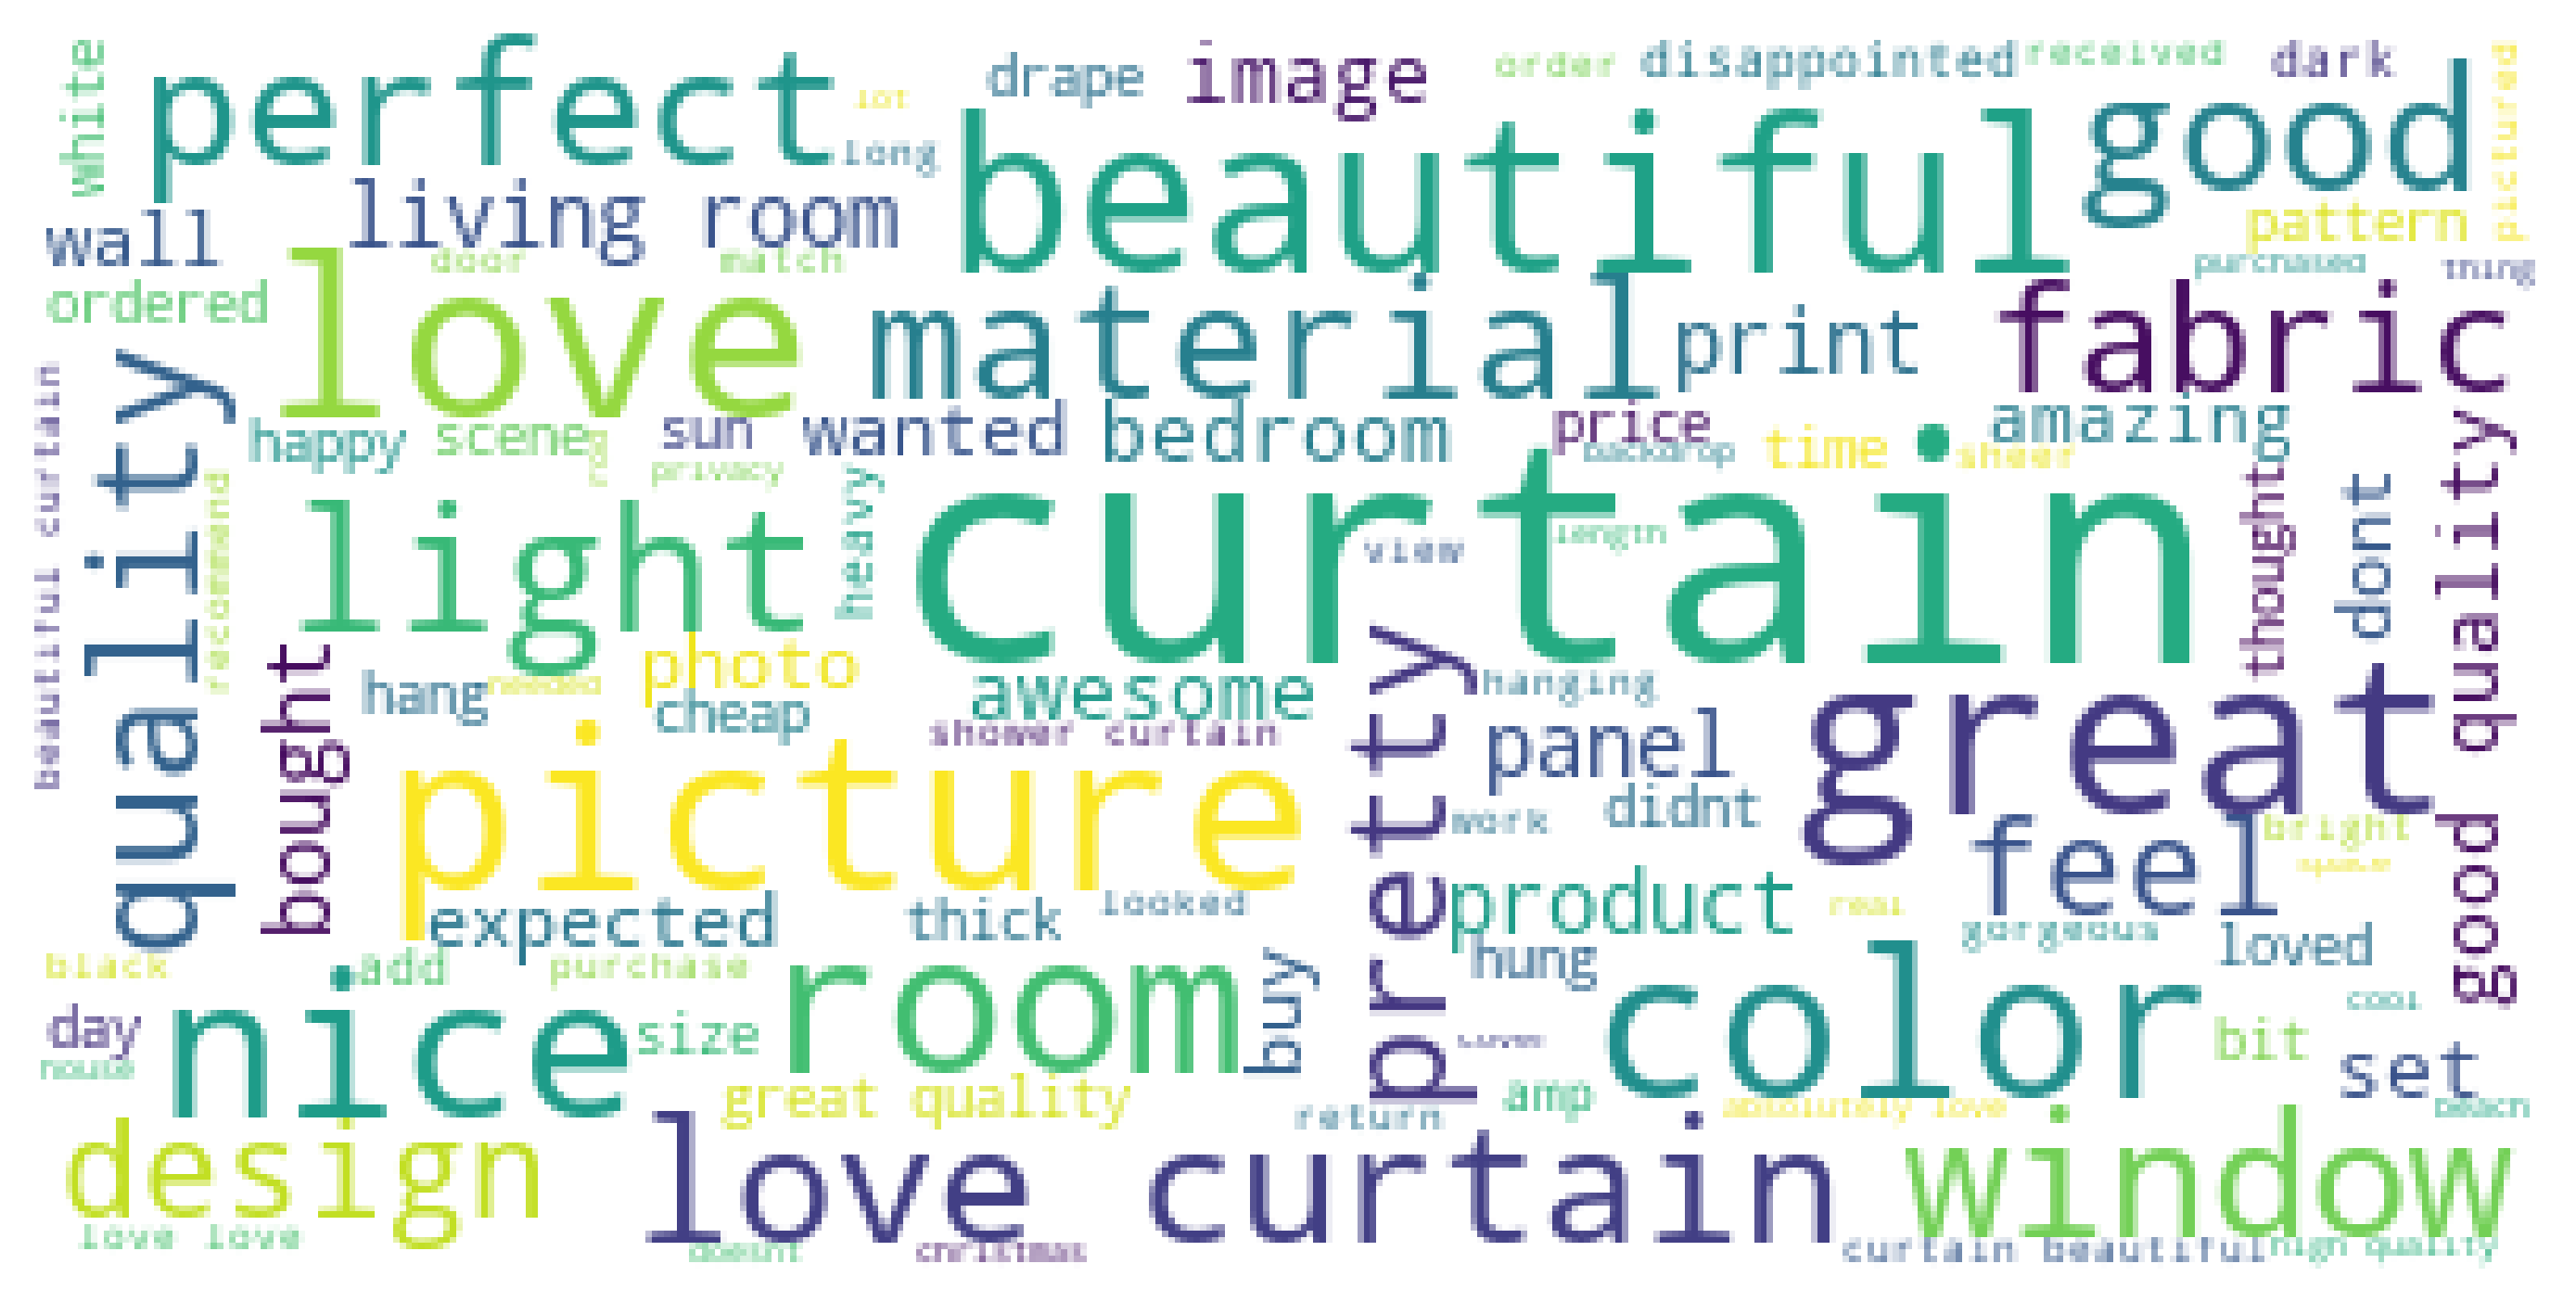

In [31]:
# Wordcloud 


text = " ".join(i for i in df.Review) 

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text) 

plt.figure(figsize=(15,6), dpi=300)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

In [32]:
# Sentiment Analysis

In [33]:
df['Review'].head()

0                                                happy
1                          good quality material panel
2    product fun bedroom windowsbr imagery bit stre...
3                                              poco ma
4    great bang buck quality material vibrant color...
Name: Review, dtype: object

In [34]:
nltk.download('vader_lexicon') # pretty rate models. 

[nltk_data] Downloading package vader_lexicon to C:\Users\Harshit
[nltk_data]     Panchal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
sia = SentimentIntensityAnalyzer() 
sia.polarity_scores('The movie was awesome')

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [36]:
# compound score [-1,1] , < 0 the review is negative and if score is > 0 the text is positive

In [37]:
df['Review'][0:10].apply(lambda x: sia.polarity_scores(x)['compound'])

0    0.5719
1    0.4404
2    0.5106
3    0.0000
4    0.9042
5    0.0000
6    0.6249
7    0.8737
8    0.0000
9    0.7096
Name: Review, dtype: float64

In [38]:
df['polarity_score'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [39]:
df.head()

,Star,HelpFul,Title,Review,polarity_score
0,5,0,looks great,happy,0.5719
1,5,0,Pattern did not align between the two panels.,good quality material panel,0.4404
2,5,0,Imagery is stretched. Still fun.,product fun bedroom windowsbr imagery bit stre...,0.5106
3,5,0,Que se ven elegantes muy finas,poco ma,0.0000
4,5,0,Wow great purchase,great bang buck quality material vibrant color...,0.9042


In [40]:
df['Review'][0:10].apply(lambda x : "pos" if sia.polarity_scores(x)['compound'] > 0 else 'neg')

0    pos
1    pos
2    pos
3    neg
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: Review, dtype: object

In [41]:
df['label'] = df['Review'].apply(lambda x : "pos" if sia.polarity_scores(x)['compound'] > 0 else 'neg')

In [42]:
df

,Star,HelpFul,Title,Review,polarity_score,label
0,5,0,looks great,happy,0.5719,pos
1,5,0,Pattern did not align between the two panels.,good quality material panel,0.4404,pos
2,5,0,Imagery is stretched. Still fun.,product fun bedroom windowsbr imagery bit stre...,0.5106,pos
3,5,0,Que se ven elegantes muy finas,poco ma,0.0000,neg
4,5,0,Wow great purchase,great bang buck quality material vibrant color...,0.9042,pos
...,...,...,...,...,...,...
5606,4,0,Recommend,great product reasonable money delivered stage...,0.7650,pos
5607,5,0,"Terrible , different colors. I returned",color panel match,0.0000,neg
5608,5,0,Extremely pleasing,great studio complement entire theme area phot...,0.7906,pos
5609,5,0,Perfect,brought beauty kid room love,0.8402,pos


In [43]:
df['label'].value_counts()

pos    4458
neg    1135
Name: label, dtype: int64

In [44]:
df.groupby('label')['Star'].mean()

label
neg    3.481057
pos    4.643562
Name: Star, dtype: float64

In [45]:
# Sentiment modelling 

mapp = {'pos': 1, 'neg' : 0} 

df['label'] = df['label'].map(mapp)

In [46]:
df

,Star,HelpFul,Title,Review,polarity_score,label
0,5,0,looks great,happy,0.5719,1
1,5,0,Pattern did not align between the two panels.,good quality material panel,0.4404,1
2,5,0,Imagery is stretched. Still fun.,product fun bedroom windowsbr imagery bit stre...,0.5106,1
3,5,0,Que se ven elegantes muy finas,poco ma,0.0000,0
4,5,0,Wow great purchase,great bang buck quality material vibrant color...,0.9042,1
...,...,...,...,...,...,...
5606,4,0,Recommend,great product reasonable money delivered stage...,0.7650,1
5607,5,0,"Terrible , different colors. I returned",color panel match,0.0000,0
5608,5,0,Extremely pleasing,great studio complement entire theme area phot...,0.7906,1
5609,5,0,Perfect,brought beauty kid room love,0.8402,1


In [47]:
# Count Vactorization 

corpus = ['This is the first document', 
         'This document is the second document', 
         'And this is the third one', 
         'is this the first document?']

In [48]:
vect = CountVectorizer() 
X_c = vect.fit_transform(corpus) 
vect.get_feature_names()

C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [49]:
'This is the first document' = sent  
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

SyntaxError: cannot assign to literal (<ipython-input-49-dc567eb2a8f2>, line 1)

In [ ]:
X_c.toarray()

In [ ]:
tf_idf = TfidfVectorizer() 
corpus_tf_idf = tf_idf.fit_transform(corpus) 
tf_idf.get_feature_names_out()

In [ ]:
corpus_tf_idf.toarray()

In [ ]:
X = df['Review'] 
y = df['label']

In [ ]:
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

In [ ]:
vectorizer.get_feature_names()[0:15]

In [ ]:
# print(list(X_count.toarray()[0]))

In [ ]:
tf_idf_dataset = TfidfVectorizer() 
X_tf_idf_word = tf_idf_dataset.fit_transform(X) 

In [ ]:
print(list(X_tf_idf_word.toarray())[0])

In [54]:
df = pd.read_parquet('0000 (1).parquet')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [59]:
print(len(list(df.track_genre.value_counts())))

114


In [51]:
!pip3 install pyarrow 

In [52]:
!pip3 install fastparquet

  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Harshit Panchal\\.conda\\envs\\textenv\\lib\\site-packages\\~andas\\_libs\\algos.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



      Successfully uninstalled pandas-1.2.4
